# Time Series Analysis

In [268]:
import warnings
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn')
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (19, 5)

In [86]:
ts_all = pd.read_csv('ts_all.csv', header=None)
ts_technology = pd.read_csv('ts_technology.csv', header=None)
ts_furniture = pd.read_csv('ts_furniture.csv', header=None)
ts_office_supplies = pd.read_csv('ts_office_supplies.csv', header=None)
ts_all.columns = ['Order_Date', 'Sales']
ts_technology.columns = ['Order_Date', 'Sales']
ts_furniture.columns = ['Order_Date', 'Sales']
ts_office_supplies.columns = ['Order_Date', 'Sales']

In [87]:
print(len(ts_all), len(ts_technology), len(ts_furniture), len(ts_office_supplies))

1430 1338 1332 1413


In [88]:
ts_all['Order_Date'] = pd.to_datetime(ts_all.Order_Date)
ts_technology['Order_Date'] = pd.to_datetime(ts_technology.Order_Date)
ts_furniture['Order_Date'] = pd.to_datetime(ts_furniture.Order_Date)
ts_office_supplies['Order_Date'] = pd.to_datetime(ts_office_supplies.Order_Date)
ts_all = ts_all.set_index('Order_Date')
ts_technology = ts_technology.set_index('Order_Date')
ts_furniture = ts_furniture.set_index('Order_Date')
ts_office_supplies = ts_office_supplies.set_index('Order_Date')

In [89]:
ts_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1430 entries, 2012-01-01 to 2015-12-31
Data columns (total 1 columns):
Sales    1430 non-null float64
dtypes: float64(1)
memory usage: 22.3 KB


In [90]:
ts_technology.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1338 entries, 2012-01-02 to 2015-12-31
Data columns (total 1 columns):
Sales    1338 non-null float64
dtypes: float64(1)
memory usage: 20.9 KB


In [91]:
ts_furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1332 entries, 2012-01-01 to 2015-12-31
Data columns (total 1 columns):
Sales    1332 non-null float64
dtypes: float64(1)
memory usage: 20.8 KB


In [92]:
ts_office_supplies.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1413 entries, 2012-01-01 to 2015-12-31
Data columns (total 1 columns):
Sales    1413 non-null float64
dtypes: float64(1)
memory usage: 22.1 KB


## Plotting sales by each category

In [94]:
# Use averages daily sales for that week
weekly_sales_a = ts_all.Sales.resample('W').mean()
weekly_sales_t = ts_technology.Sales.resample('W').mean()
weekly_sales_f = ts_furniture.Sales.resample('W').mean()
weekly_sales_o = ts_office_supplies.Sales.resample('W').mean()

In [95]:
train_a = weekly_sales_a.loc[:'2014-12-28']
train_a = train_a[train_a > 1000]
test_a = weekly_sales_a.loc['2015-01-04':]
test_a = test_a[test_a > 1000]

train_t = weekly_sales_t.loc[:'2014-12-28']
train_t = train_t[train_t > 1000]
test_t = weekly_sales_t.loc['2015-01-04':]
test_t = test_t[test_t > 1000]

train_f = weekly_sales_f.loc[:'2014-12-28']
train_f = train_f[train_f > 1000]
test_f = weekly_sales_f.loc['2015-01-04':]
test_f = test_f[test_f > 1000]

train_o = weekly_sales_o.loc[:'2014-12-28']
train_o = train_o[train_o > 1000]
test_o = weekly_sales_o.loc['2015-01-04':]
test_o = test_o[test_o > 1000]

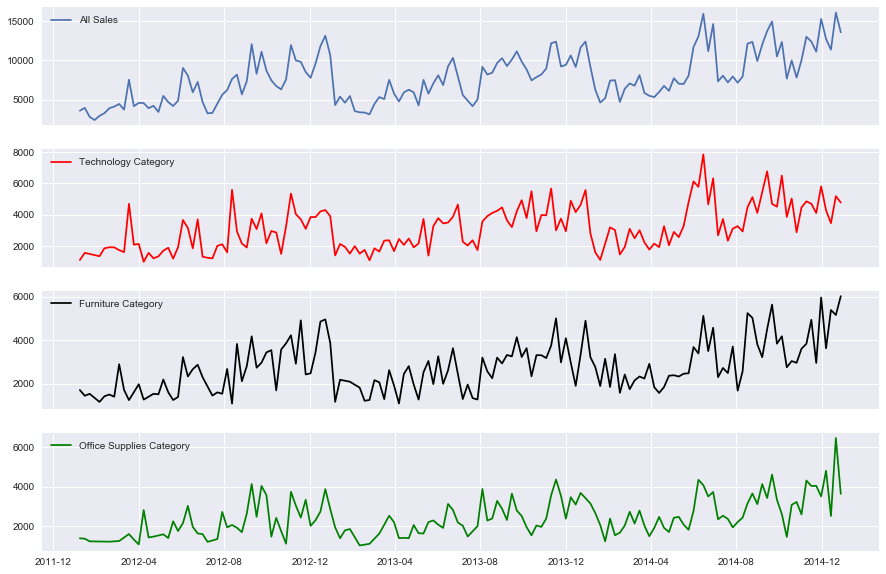

In [209]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(train_a, label='All Sales')
axes[0].legend(loc='upper left');

axes[1].plot(train_t, 'r', label='Technology Category')
axes[1].legend(loc='upper left');

axes[2].plot(train_f, 'k', label='Furniture Category')
axes[2].legend(loc='upper left');

axes[3].plot(train_o, 'g', label='Office Supplies Category')
axes[3].legend(loc='upper left');

As we can observe from the plots above, there's seasonality in this dataset.

## Decomposition

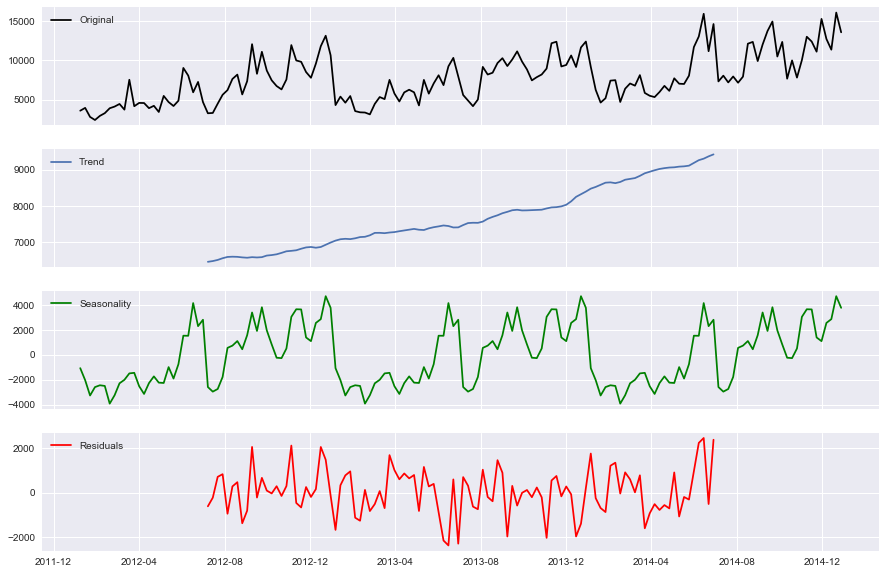

In [210]:
ss_decomposition = seasonal_decompose(x=train_a, model='additive')

trend = ss_decomposition.trend
seasonal = ss_decomposition.seasonal
residual = ss_decomposition.resid

fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(train_a, 'k', label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(seasonal, 'g', label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(residual, 'r', label='Residuals')
axes[3].legend(loc='upper left');

## Diagnose model parameters

### Use differencing to determine the number of d

#### 1. All Categories

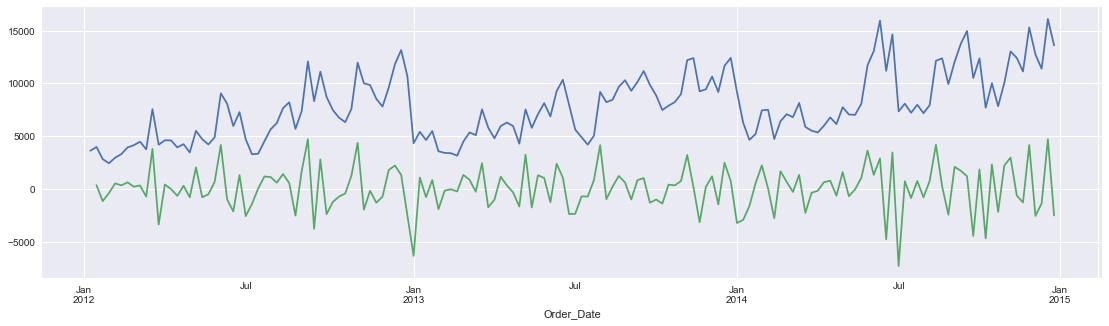

In [211]:
# Plot diff of weekly sales over time against sales
train_a.plot()
train_a.diff().plot();
#train_a.diff().diff().plot()

In [100]:
# check deviation of different difference levels for weekly
print(train_a.std()) 
print(train_a.diff().std()) # lowest, take one difference
print(train_a.diff().diff().std())
print(train_a.diff().diff().diff().std())
print(train_a.diff().diff().diff().diff().std())

3122.2851817706714
2070.281841782326
3277.4762224504625
5832.1212989223
10762.591930568773


#### 2. Technology Category

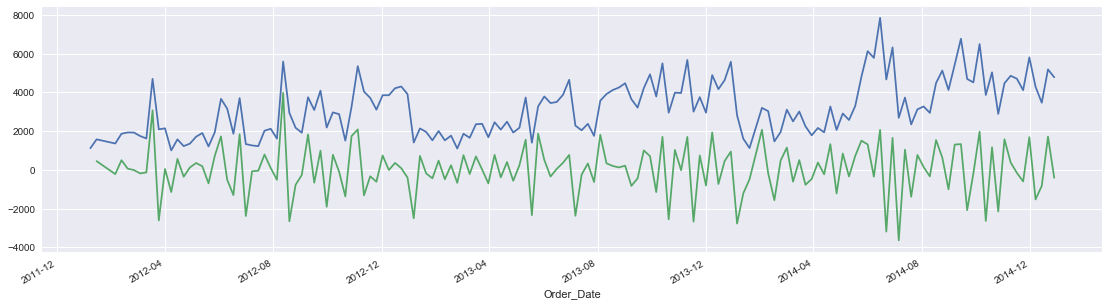

In [212]:
# Plot diff of weekly sales over time against sales
train_t.plot()
train_t.diff().plot();
# train_t.diff().diff().plot()

In [102]:
# check deviation of different difference levels for weekly
print(train_t.std()) 
print(train_t.diff().std()) # lowest, take one difference
print(train_t.diff().diff().std())
print(train_t.diff().diff().diff().std())
print(train_t.diff().diff().diff().diff().std())

1413.4297094431504
1275.6281822690933
2183.7012691262344
4025.01255839724
7607.0183980902075


#### 3. Furniture Category

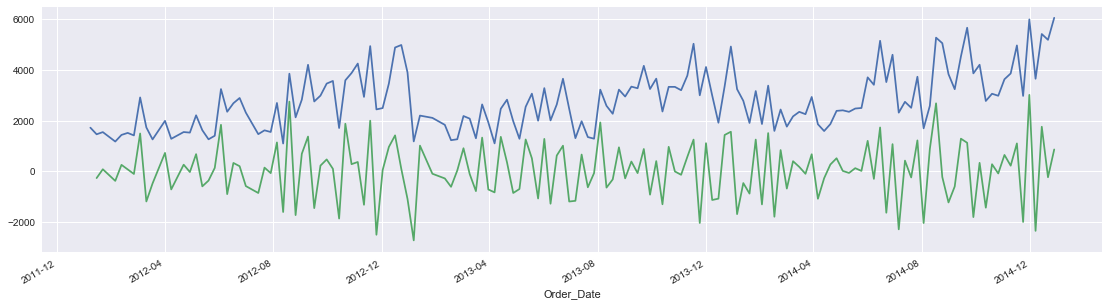

In [213]:
# Plot diff of weekly sales over time against sales
train_f.plot()
train_f.diff().plot();
#train_f.diff().diff().plot()

In [104]:
# check deviation of different difference levels for weekly
print(train_f.std()) 
print(train_f.diff().std()) # lowest, take one difference
print(train_f.diff().diff().std())
print(train_f.diff().diff().diff().std())
print(train_f.diff().diff().diff().diff().std())

1151.6531206887091
1109.9794207462746
1911.38194404363
3519.352880049155
6652.847614589852


#### 4. Office Supplies Category

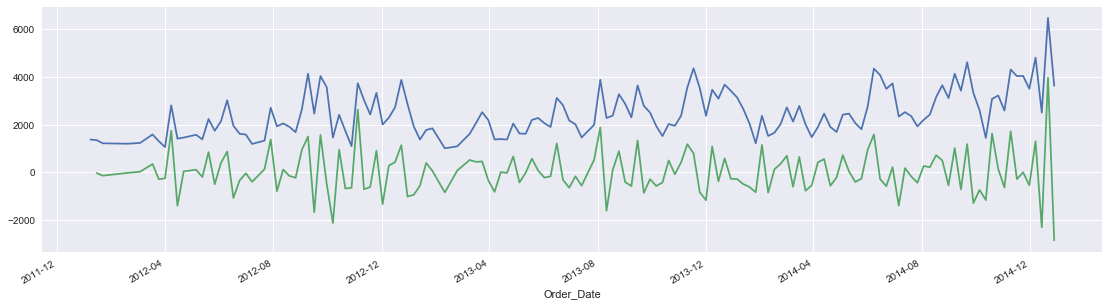

In [214]:
# Plot diff of weekly sales over time against sales
train_o.plot()
train_o.diff().plot();
#train_o.diff().diff().plot()

In [106]:
# check deviation of different difference levels for weekly
print(train_o.std()) 
print(train_o.diff().std()) # lowest, take one difference
print(train_o.diff().diff().std())
print(train_o.diff().diff().diff().std())
print(train_o.diff().diff().diff().diff().std())

951.3999617706104
920.5532981133238
1535.5384204495583
2695.964934785023
4792.308018337372


## Time series forecasting with ARIMA

### ARIMA (1, 1, 0) on all categories' daily sales

In [107]:
dfs = ts_all.Sales.astype(float)

ar1_no_ma = ARIMA(dfs, (1, 1, 0)).fit() # take one difference (d=1)
ar1_no_ma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                 1429
Model:                 ARIMA(1, 1, 0)   Log Likelihood              -14675.021
Method:                       css-mle   S.D. of innovations           6977.486
Date:                Tue, 11 Sep 2018   AIC                          29356.041
Time:                        19:57:57   BIC                          29371.835
Sample:                             1   HQIC                         29361.939
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.7120    134.901      0.065      0.949    -255.689     273.113
ar.L1.D.Sales    -0.3685      0.025    -14.992      0.000      -0.417      -0.320
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.7136           +0.0000j            2.7136            0.5000
-----------------------------------------------------------------------------
"""

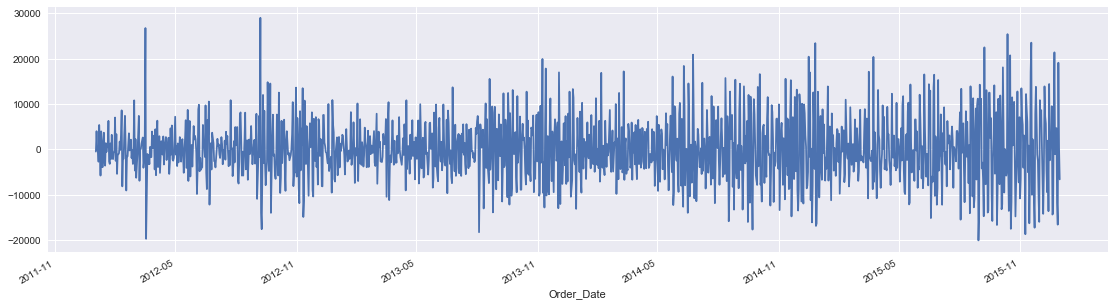

In [215]:
# plot residuals
ar1_no_ma.resid.plot();

Figure(1368x360)
Figure(1368x360)


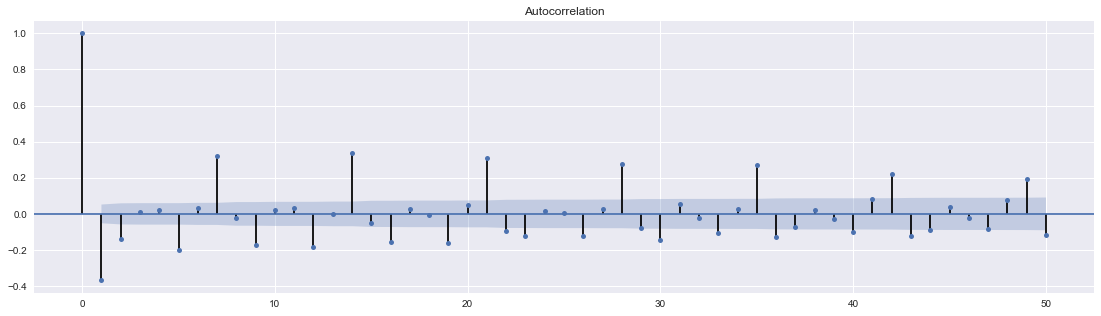

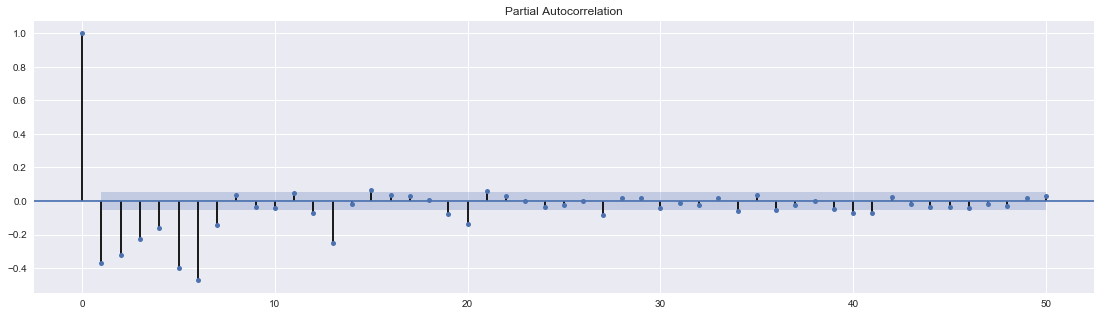

In [216]:
print(plot_acf(dfs.diff()[1:], lags=50)) # spikes and patterns show model hasn't captured variance
print(plot_pacf(dfs.diff()[1:], lags=50));

Figure(1368x360)
Figure(1368x360)


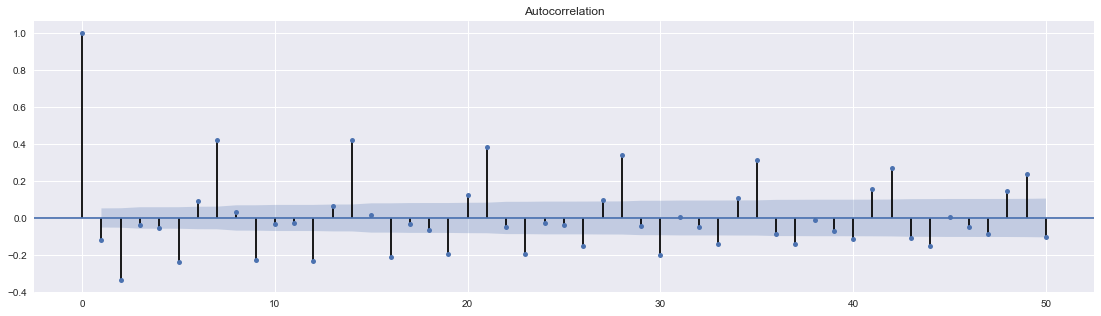

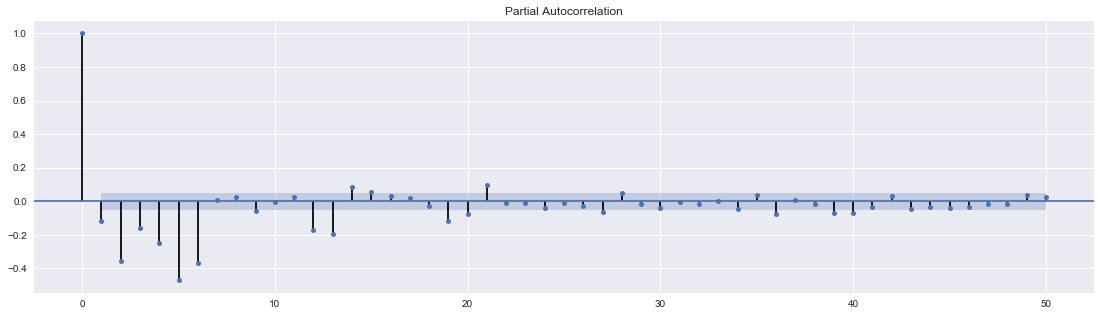

In [217]:
# plot acf and pacf
print(plot_acf(ar1_no_ma.resid, lags=50)) # spikes and patterns show model hasn't captured variance
print(plot_pacf(ar1_no_ma.resid, lags=50));

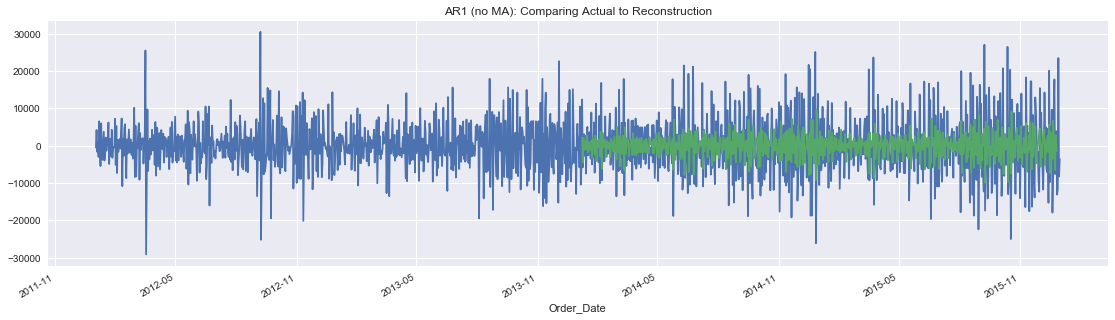

In [218]:
# plot actual vs. predicted
ts_all.Sales.diff().plot(label='Actual')
ar1_no_ma.predict(start=len(ts_all.Sales)//2,end=len(ts_all.Sales)-5).plot(label='Reconstruction')
plt.title("AR1 (no MA): Comparing Actual to Reconstruction");
# Some improvement can be made to build a better model and there's seasonality in this dataset, so SARIMA will prob preform better

### SARIMA on all categories' weekly sales

#### 1. Initial model

In [112]:
sarima0 = sm.tsa.statespace.SARIMAX(train_a, order=(0,0,0), seasonal_order=(0,0,0,0), trend='c').fit()
sarima0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  156
Model:                        SARIMAX   Log Likelihood               -1476.079
Date:                Tue, 11 Sep 2018   AIC                           2956.158
Time:                        19:58:11   BIC                           2962.257
Sample:                    01-08-2012   HQIC                          2958.635
                         - 12-28-2014                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7774.7897    272.591     28.522      0.000    7240.522    8309.057
sigma2      9.686e+06   1.35e+06      7.155      0.000    7.03e+06    1.23e+07
===================================================================================
Ljung-Box (Q):                      423.77   Jarque-Bera (JB):                 7.91
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.36   Skew:                             0.51
Prob(H) (two-sided):                  0.27   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

##### Autocorrection

Figure(1368x360)
Figure(1368x360)


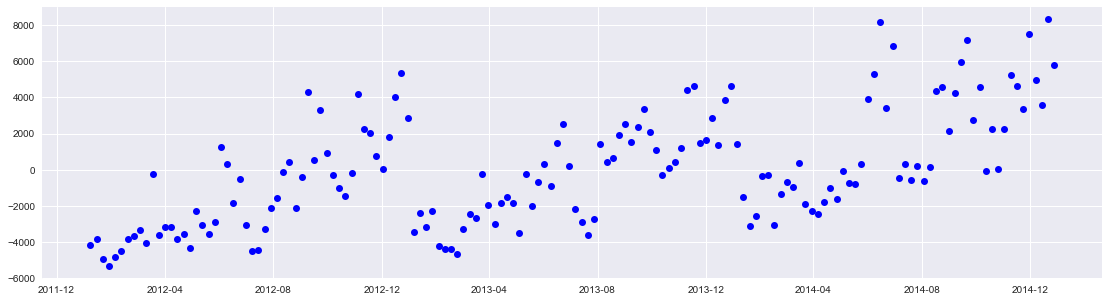

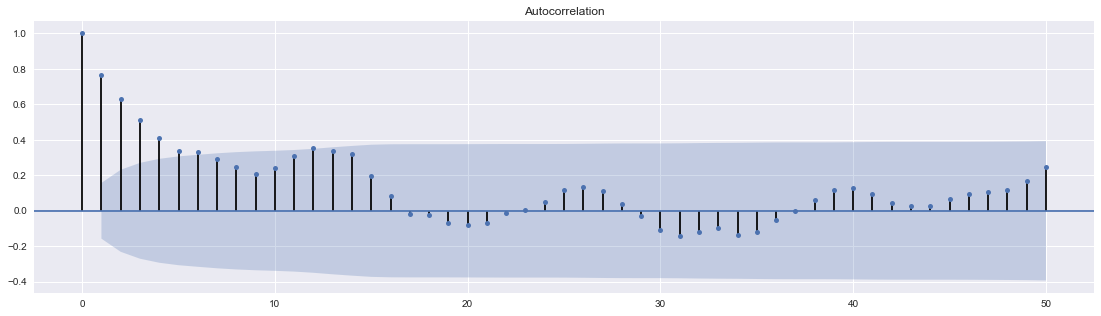

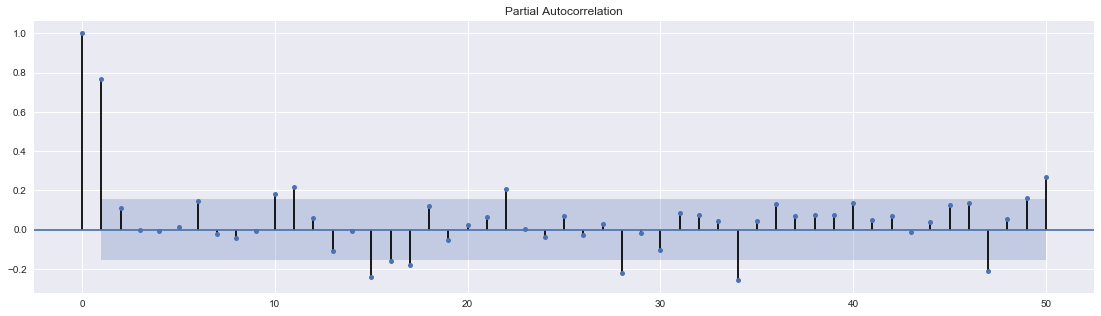

In [219]:
# plot residual, acf ,and pacf 
plt.plot(sarima0.resid, 'bo')
print(plot_acf(sarima0.resid, lags=50))
print(plot_pacf(sarima0.resid, lags=50));

#### 2. Model 1

There's a seasoanl trend in my initial model. So for the next model, I will set s=52 for this weekly dataset and d=1 from the differencing part.

In [114]:
sarima1 = sm.tsa.statespace.SARIMAX(train_a, order=(0,1,0), seasonal_order=(0,1,0,52), trend='c').fit()
sarima1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  156
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 52)   Log Likelihood                -954.816
Date:                            Tue, 11 Sep 2018   AIC                           1913.631
Time:                                    19:58:18   BIC                           1918.901
Sample:                                01-08-2012   HQIC                          1915.765
                                     - 12-28-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5199    253.166      0.018      0.986    -491.675     500.715
sigma2      6.598e+06   9.95e+05      6.629      0.000    4.65e+06    8.55e+06
===================================================================================
Ljung-Box (Q):                       86.01   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.00   Prob(JB):                         0.83
Heteroskedasticity (H):               1.63   Skew:                            -0.03
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Figure(1368x360)
Figure(1368x360)


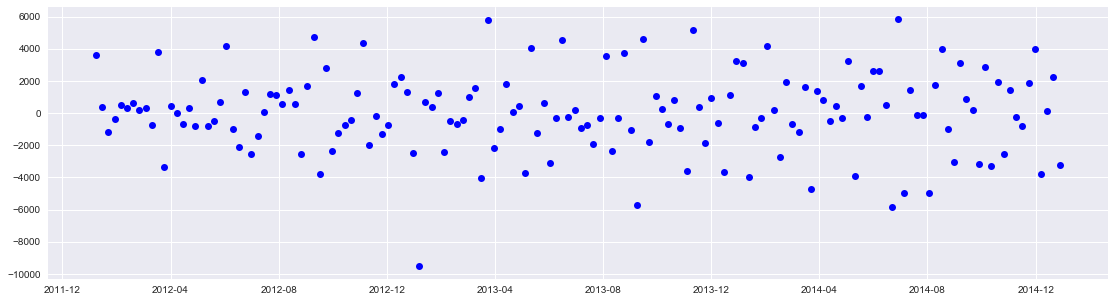

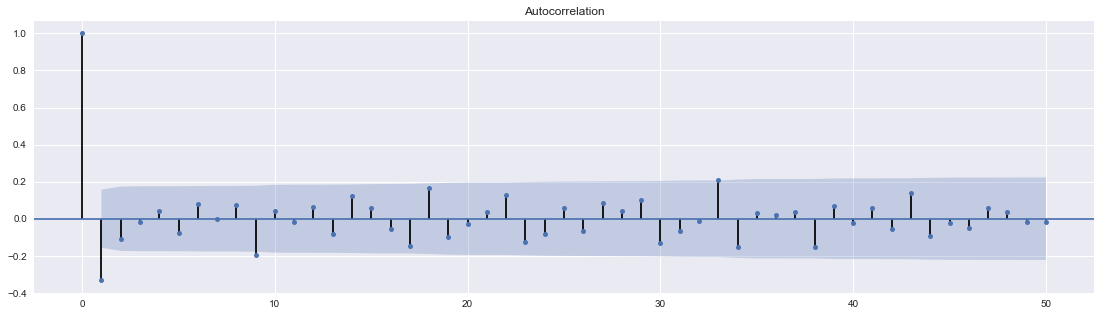

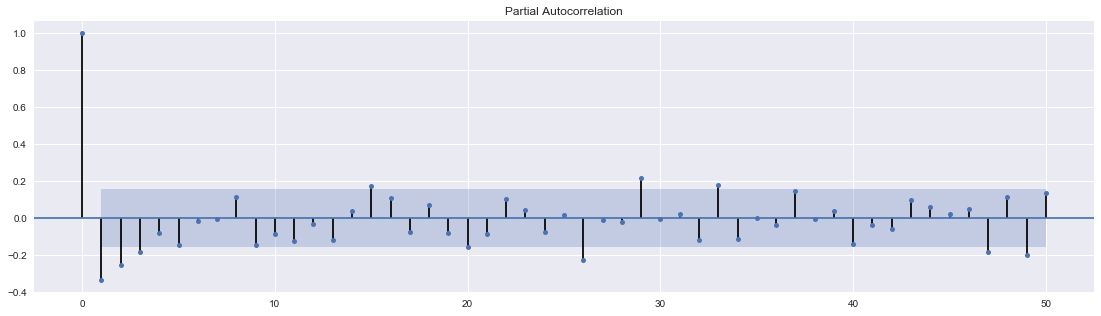

In [220]:
# plot residual, acf ,and pacf 
plt.plot(sarima1.resid, 'bo')
print(plot_acf(sarima1.resid, lags=50))
print(plot_pacf(sarima1.resid, lags=50));

#### 3. Model 2

From the autocorrelation above, I will try p=1 since there're three spikes we can observe from the PACF.

In [116]:
sarima2 = sm.tsa.statespace.SARIMAX(train_a, order=(1,1,0), seasonal_order=(1,1,0,52), trend='c').fit()
sarima2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  156
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 52)   Log Likelihood                -929.315
Date:                            Tue, 11 Sep 2018   AIC                           1866.630
Time:                                    19:58:32   BIC                           1877.169
Sample:                                01-08-2012   HQIC                          1870.899
                                     - 12-28-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -9.5869    212.474     -0.045      0.964    -426.028     406.854
ar.L1         -0.3811      0.083     -4.573      0.000      -0.544      -0.218
ar.S.L52      -0.5589      0.088     -6.320      0.000      -0.732      -0.386
sigma2      3.956e+06   6.21e+05      6.367      0.000    2.74e+06    5.17e+06
===================================================================================
Ljung-Box (Q):                       51.62   Jarque-Bera (JB):                 0.71
Prob(Q):                              0.10   Prob(JB):                         0.70
Heteroskedasticity (H):               2.42   Skew:                             0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Figure(1368x360)
Figure(1368x360)


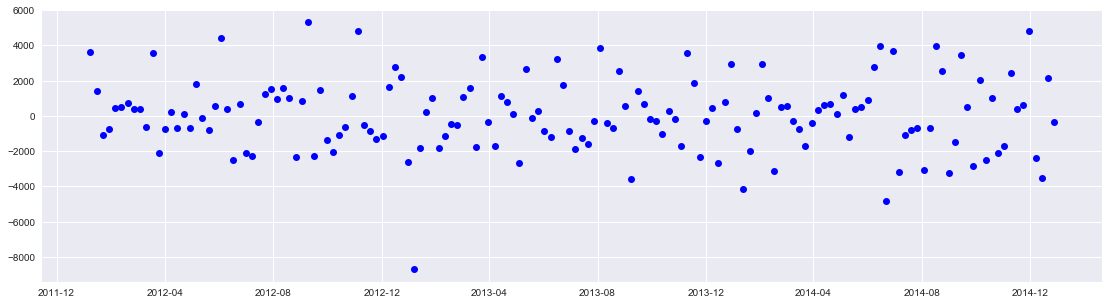

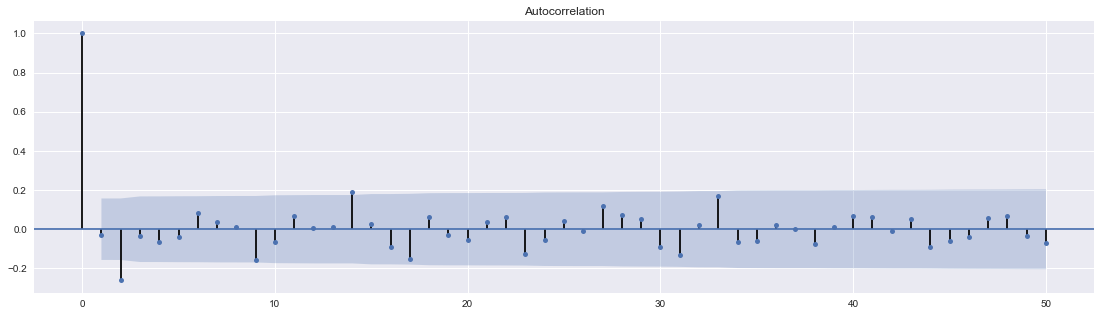

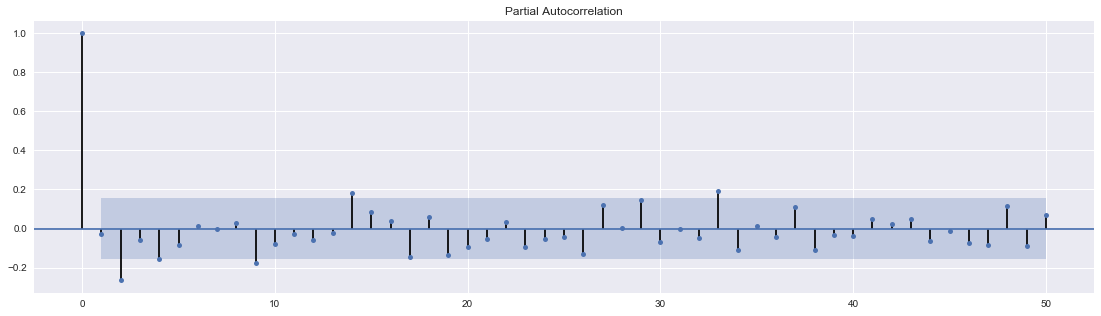

In [221]:
# plot residual, acf ,and pacf 
plt.plot(sarima2.resid, 'bo')
print(plot_acf(sarima2.resid, lags=50))
print(plot_pacf(sarima2.resid, lags=50));

This one seems pretty good, but I will further compare this model 3 with the model using auto sarima.

#### Search for the best model

Turns out the best parameter for SARIMA is order=(1, 1, 1) and seasonal_order=(1, 1, 0, 52) which will give us the lowest AIC:1853.3391.

In [279]:
p = range(0, 5)
d = range(0, 2)
q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [280]:
for param in pdq:
    for param_s in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train_a, order=param, seasonal_order=param_s, trend='c', enforce_invertibility=False)
            result = model.fit()
            print('SARIMA{}x{} - AIC:{}'.format(param,param_s, result.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 52) - AIC:2956.1575816101504
SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC:1874.2724100778587
SARIMA(0, 0, 0)x(1, 1, 0, 52) - AIC:1867.5416157660989
SARIMA(0, 0, 1)x(0, 0, 0, 52) - AIC:2891.0188175164494
SARIMA(0, 0, 1)x(0, 1, 0, 52) - AIC:1874.9843010453924
SARIMA(0, 0, 1)x(1, 1, 0, 52) - AIC:1869.3634077218535
SARIMA(0, 1, 0)x(0, 0, 0, 52) - AIC:2809.8541156019437
SARIMA(0, 1, 0)x(0, 1, 0, 52) - AIC:1913.6310537280247
SARIMA(0, 1, 0)x(1, 0, 0, 52) - AIC:2811.263676099801
SARIMA(0, 1, 0)x(1, 1, 0, 52) - AIC:1882.0826638074957
SARIMA(0, 1, 0)x(2, 0, 0, 52) - AIC:2812.521527953483
SARIMA(0, 1, 1)x(0, 0, 0, 52) - AIC:2800.4498870765938
SARIMA(0, 1, 1)x(0, 1, 0, 52) - AIC:1877.5580151863628
SARIMA(0, 1, 1)x(1, 0, 0, 52) - AIC:2797.7788718734155
SARIMA(0, 1, 1)x(1, 1, 0, 52) - AIC:1854.0310752347698
SARIMA(0, 1, 1)x(2, 0, 0, 52) - AIC:2797.5843366675044
SARIMA(1, 0, 0)x(0, 0, 0, 52) - AIC:2814.3096737836704
SARIMA(1, 0, 0)x(0, 1, 0, 52) - AIC:1874.9575958749615
SARIMA(1, 0,

#### My best model

In [119]:
sarima_best = sm.tsa.statespace.SARIMAX(train_a, order=(1,1,1), seasonal_order=(1,1,0,52), trend='c', enforce_invertibility=False).fit()
sarima_best.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  156
Model:             SARIMAX(1, 1, 1)x(1, 1, 0, 52)   Log Likelihood                -921.670
Date:                            Tue, 11 Sep 2018   AIC                           1853.339
Time:                                    19:58:58   BIC                           1866.513
Sample:                                01-08-2012   HQIC                          1858.675
                                     - 12-28-2014                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -4.5247     11.561     -0.391      0.696     -27.184      18.135
ar.L1          0.3346      0.086      3.882      0.000       0.166       0.504
ma.L1         -1.0019      0.139     -7.221      0.000      -1.274      -0.730
ar.S.L52      -0.5511      0.087     -6.336      0.000      -0.722      -0.381
sigma2      3.029e+06   2.22e-05   1.36e+11      0.000    3.03e+06    3.03e+06
===================================================================================
Ljung-Box (Q):                       30.57   Jarque-Bera (JB):                16.05
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.75   Skew:                             0.87
Prob(H) (two-sided):                  0.11   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.14e+27. Standard errors may be unstable.
"""

Figure(1368x360)
Figure(1368x360)


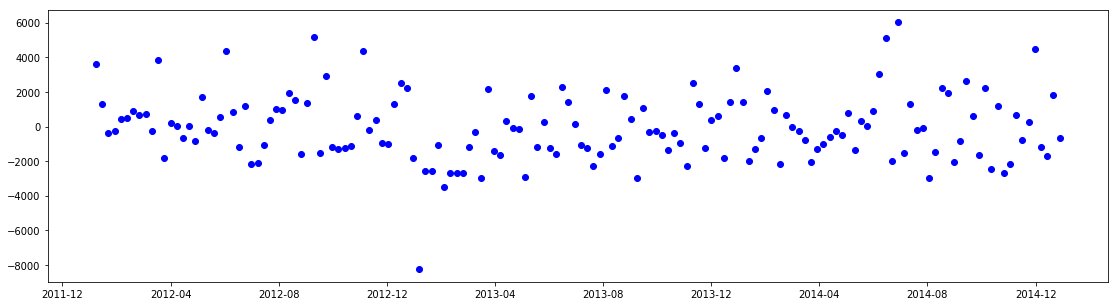

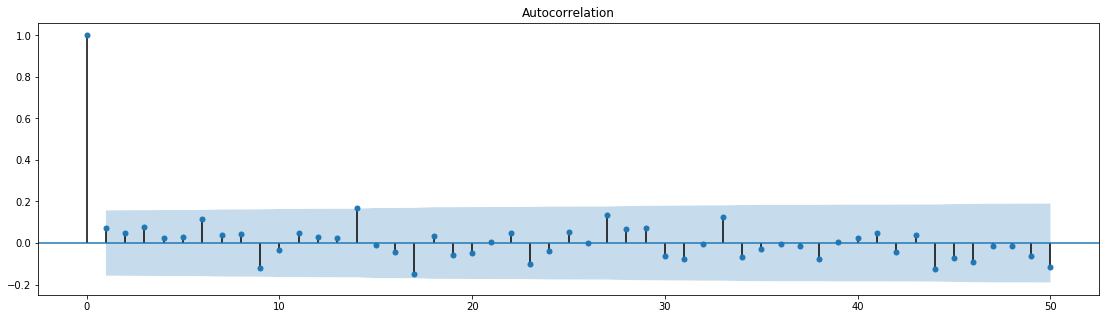

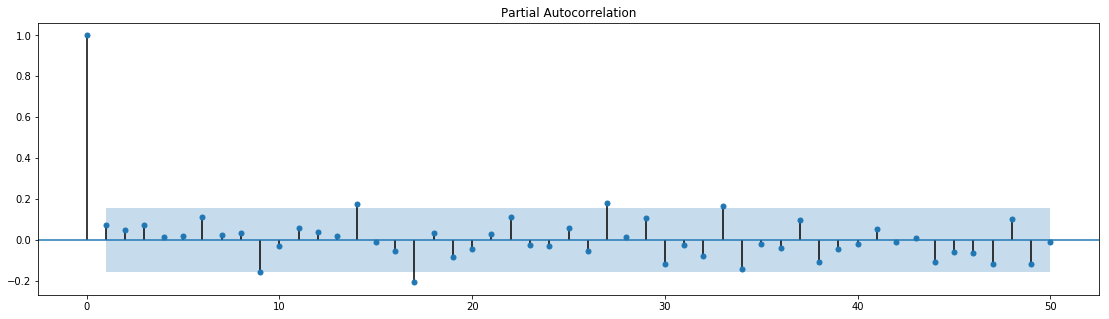

In [120]:
# plot residual, acf ,and pacf 
plt.plot(sarima_best.resid, 'bo')
print(plot_acf(sarima_best.resid, lags=50))
print(plot_pacf(sarima_best.resid, lags=50));

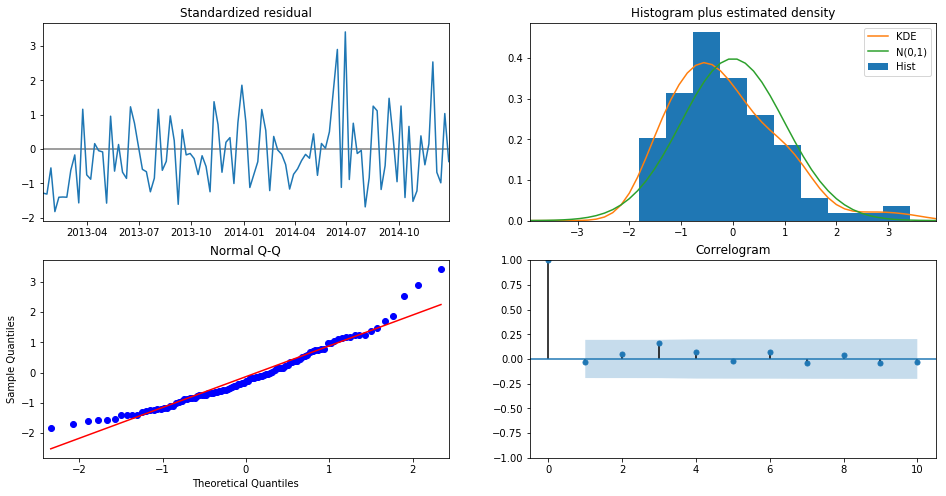

In [121]:
sarima_best.plot_diagnostics(figsize=(16, 8))
plt.show()

### Forecast using my best SARIMA model

#### Validating the forecasts before predicting future sales

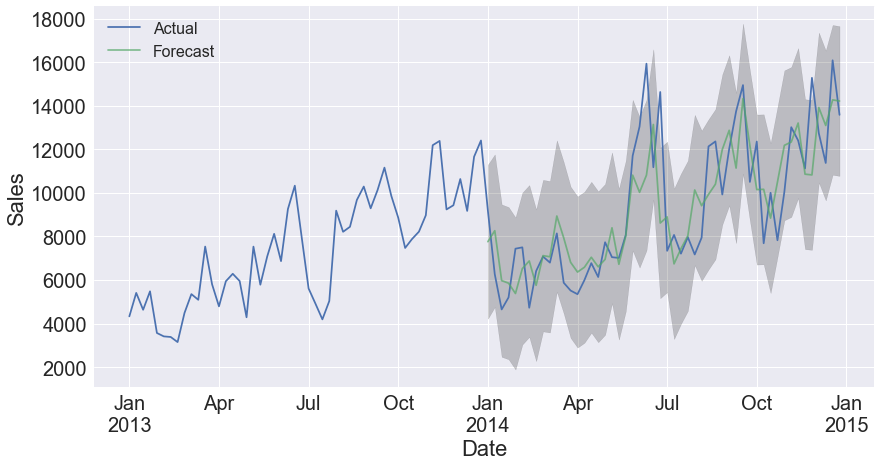

In [295]:
pred = sarima_best.get_prediction(start=pd.to_datetime('2014-01-05'), dynamic=False)
pred_ci = pred.conf_int()
ax = train_a['2013':].plot(label='Actual')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date', fontsize=22)
ax.set_ylabel('Sales', fontsize=22)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.legend(loc='upper left', prop={'size': 16})
plt.show();

##### Compute the RMSE

In [303]:
y_pred = pred.predicted_mean
y_actual = train_a['2014-01-05':]

In [304]:
rmse = np.sqrt(((y_pred - y_actual)**2).mean())
print('The Root Mean Squared Error of my forecasts is {}'.format(round(rmse, 4)))

The Root Mean Squared Error of my forecasts is 1949.2542


In [305]:
MAX = round(train_a.max(), 2)
MIN = round(train_a.min(), 2)
print('The weekly sales range from {} to {}'.format(MIN, MAX))

The weekly sales range from 2435.08 to 16093.15


#### Forecast the future sales for 2 years

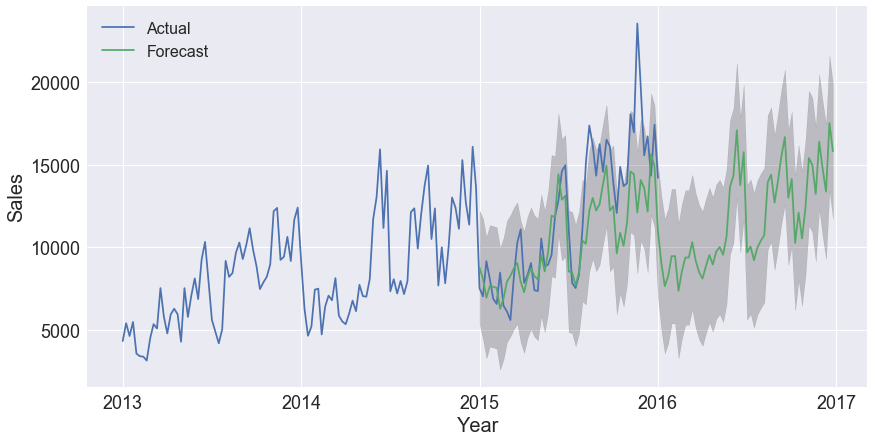

In [299]:
train_test = pd.concat([train_a, test_a])
pred_uc = sarima_best.get_forecast(steps=104)
pred_ci = pred_uc.conf_int()
ax = train_test['2013':].plot(label='Actual', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Year', fontsize=20)
ax.set_ylabel('Sales', fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.legend(loc='upper left', prop={'size': 16})
plt.show()

##### Compute the RMSE

In [300]:
y_pred = pred_uc.predicted_mean
y_actual = test_a

In [301]:
rmse = np.sqrt(((y_pred - y_actual)**2).mean())
print('The Root Mean Squared Error of my forecasts is {}'.format(round(rmse, 4)))

The Root Mean Squared Error of my forecasts is 2831.0879


In [302]:
MAX = round(test_a.max(), 2)
MIN = round(test_a.min(), 2)
print('The weekly sales range from {} to {}'.format(MIN, MAX))

The weekly sales range from 5600.42 to 23551.18
